# Logical Modeling Course Project
    
    Course: Logical Modeling for Experimental Design in Current and Future Biotechnology and Biomedicine, 
            BI8040, NTNU
    Date:   August - September 2018
    Name:   John Zobolas, PhD Candidate, Department of Biology, NTNU

## Intro 
    
The purpose of this notebook is to present the analysis done on the boolean model that was published in the paper by [Gupta et al. (2018)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6053189/), titled **Modeling the role of microRNA-449a in the regulation of the G2/M cell cycle checkpoint in prostate LNCaP cells under ionizing radiation**. The first part of our analysis will be to reproduce the results from this paper using the different tools provided by the [CoLoMoTo notebook](https://www.frontiersin.org/articles/10.3389/fphys.2018.00680/full). Next we will try to extend the model by adding one more interaction and study the dynamical behaviour that arises from it.

## Reproducing the results from [Gupta et al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6053189/)

### Importing modules
Here we import all the modules that we will need for our subsequent analyses.

In [56]:
import ginsim
import biolqm
import maboss
import pypint
import timeit
from colomoto_jupyter import tabulate
from IPython.display import Image
from colomoto.temporal_logics import *
import matplotlib.pyplot as plt
from itertools import product
plt.rcParams.update({'figure.max_open_warning': 0}) # supress warnings when plotting too many piecharts

The command used to run the notebook was (note also the version of the docker image):
```
cd pathTo/colomoto-docker
python colomoto_docker.py -V 2018-08-17 --bind pathTo/course_logical_modeling_august_2018/
```

### Loading the model

First, we will load the model from the GINsim file which we uploaded in a private repository to ease access (until it's uploaded on a public repository, like GINsim's model repository). Note that the name of the node `_14_3_3s` was modified to `p14_3_3s` because of a conversion problem from GINsim to MaBoSS.

Downloading 'https://raw.githubusercontent.com/bblodfon/colomotoGupta/master/gupta_model.zginml'

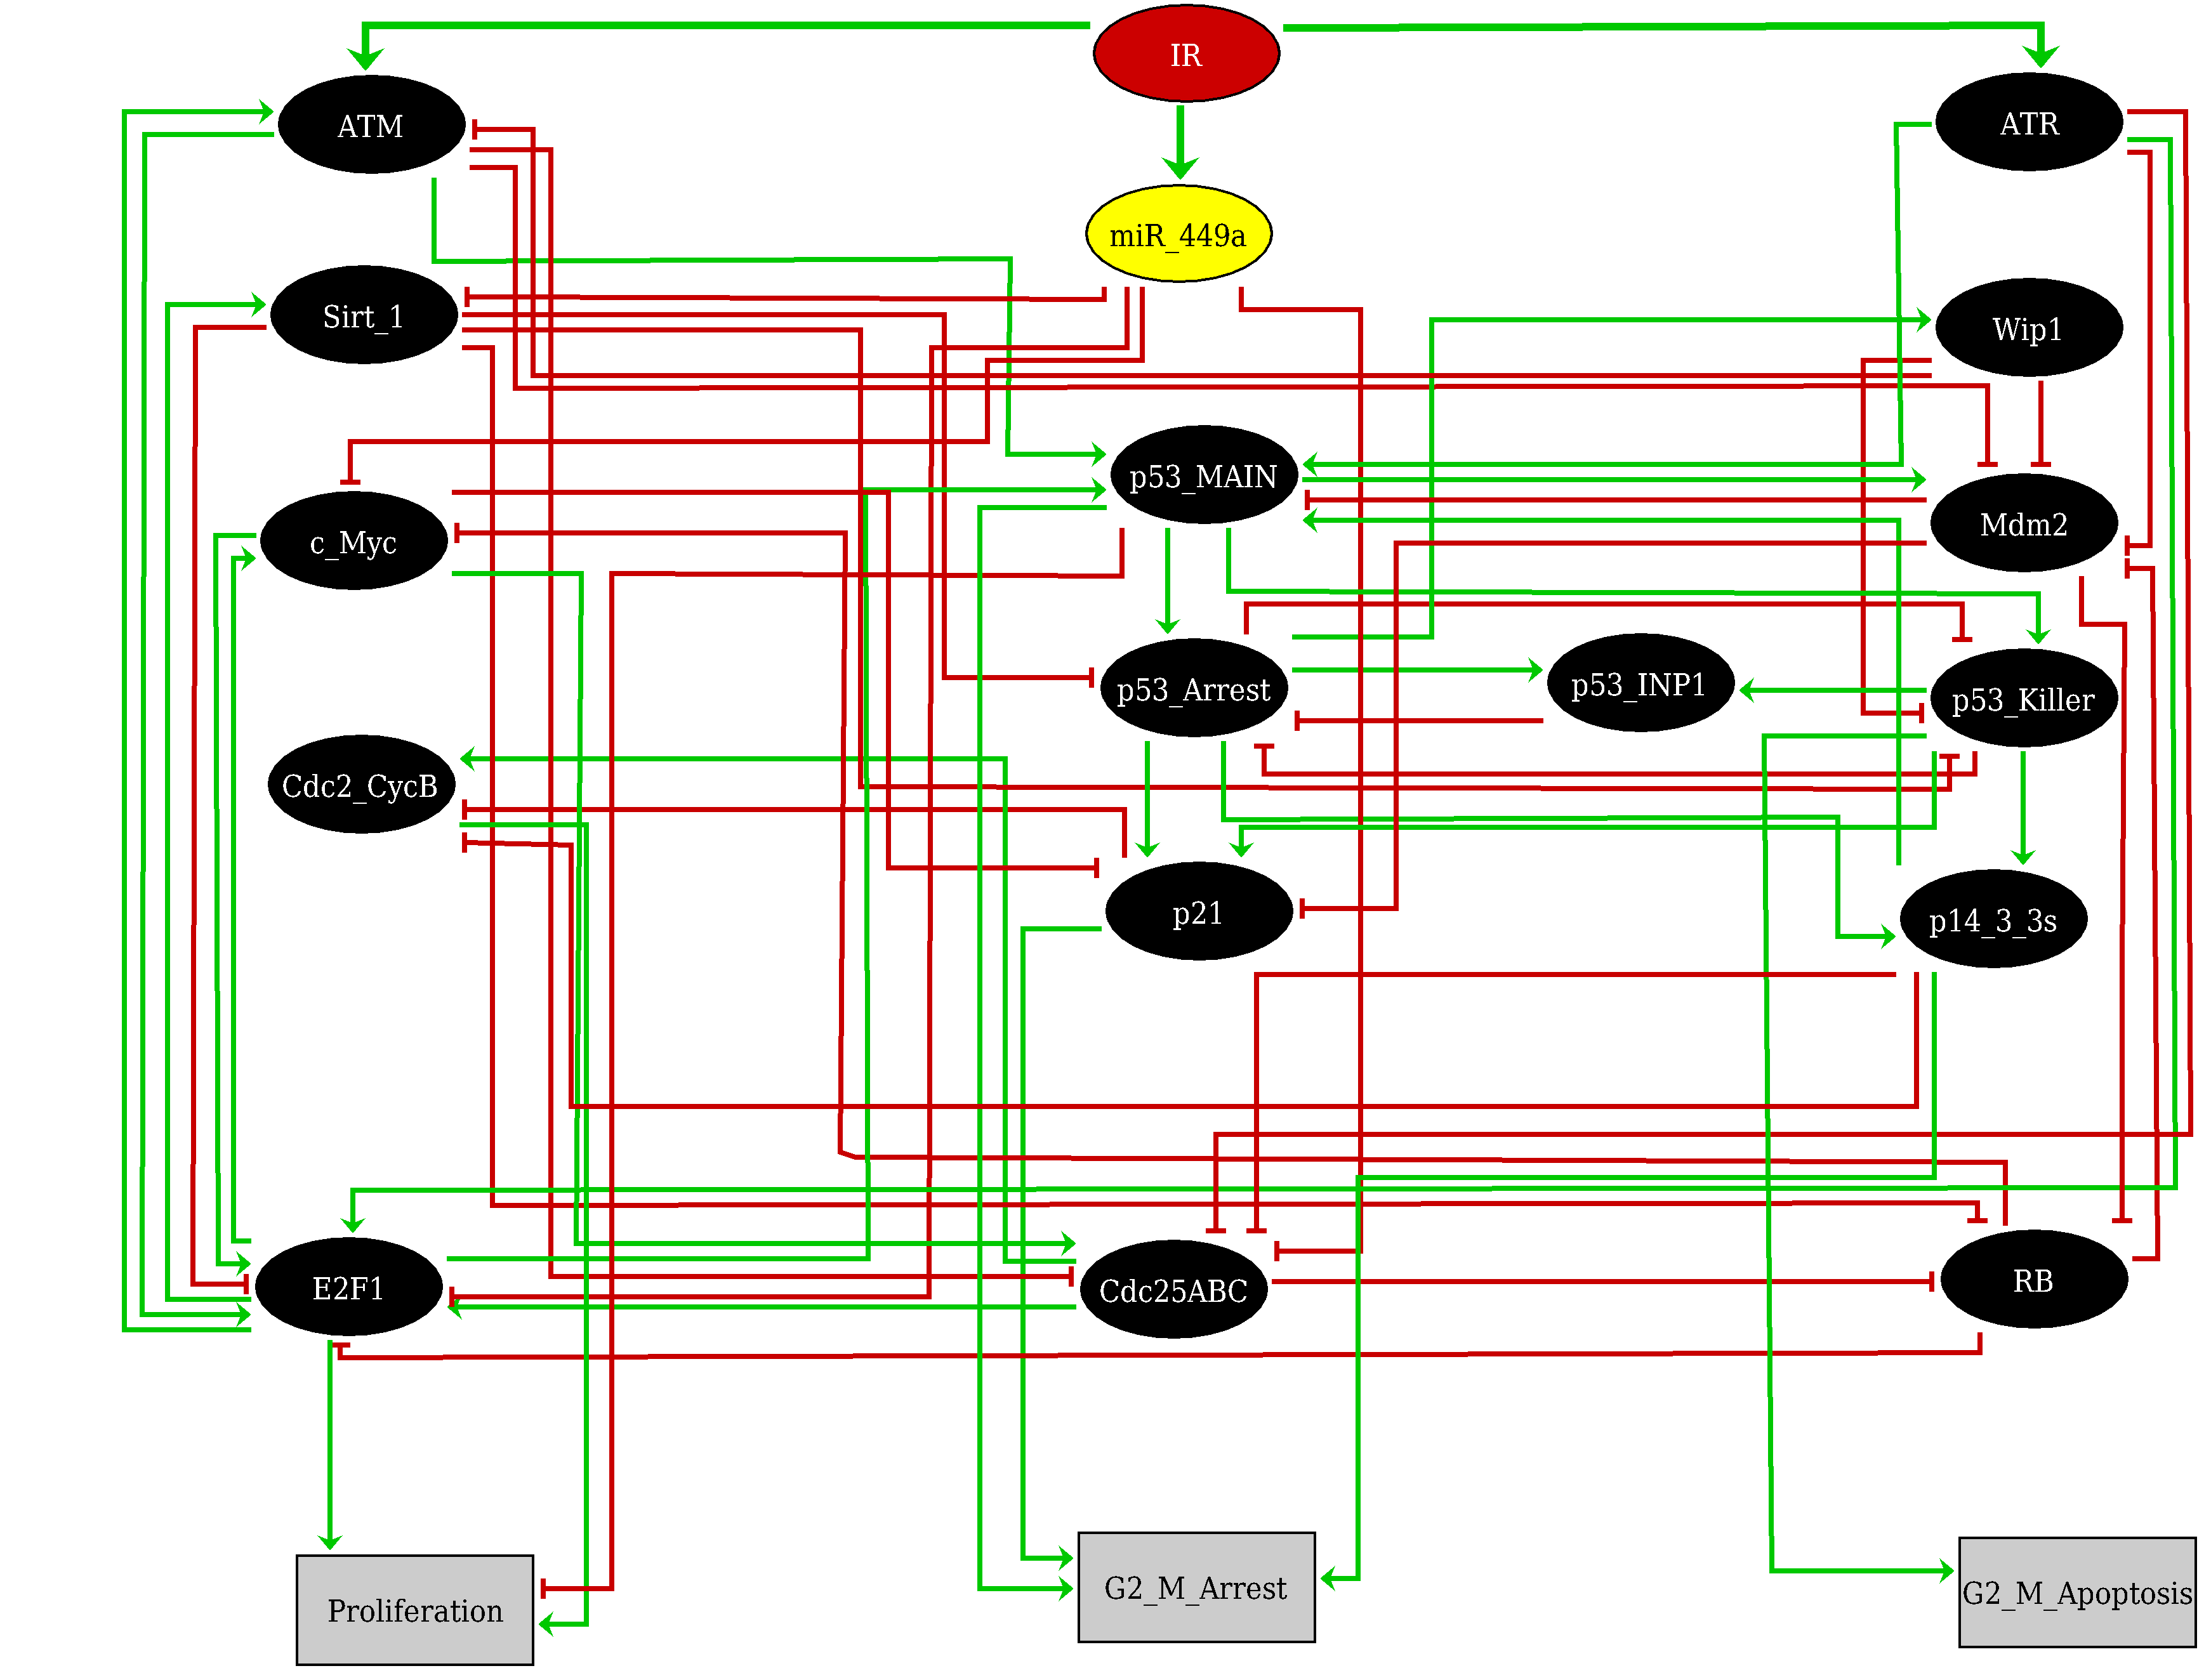

In [57]:
gupta_ginsim = ginsim.load("https://raw.githubusercontent.com/bblodfon/colomotoGupta/master/gupta_model.zginml")
ginsim.show(gupta_ginsim)

The above figure represents the regulatory network for the `G2/M` cell cycle checkpoint in response to `IR` (Ionizing Radiation: the red node that is modeled as the single input to the network). The elliptic nodes in black represent proteins and the yellow node is `miR-449a`. The micro RNA 449a affects many important nodes in this network and the main goal of this study is to understand its influence to the molecular mechanisms of the `G2/M` checkpoint. The rectangular light gray nodes represent model outputs / phenotypes (`Proliferation`, `G2/M Arrest` and `Apoptosis`). Green and red arcs denote positive and negative interactions, respectively. The model has a total of 21 nodes representing proteins or miRNAs and 61 direct interactions among them.

### Attractors of the wild-type network

The authors found 3 stable states for the wild-type case dynamics that are directly associated with the 3 different phenotypes. We will use the Java library [bioLQM](http://colomoto.org/biolqm) for this analysis:

In [58]:
gupta_lqm = ginsim.to_biolqm(gupta_ginsim)

In [59]:
fixed_points = biolqm.fixpoints(gupta_lqm)
print("Number of fixed points:", len(fixed_points))
tabulate(fixed_points)

Number of fixed points: 3


|    |   IR |   ATM |   ATR |   Mdm2 |   p53_MAIN |   p53_INP1 |   p53_Arrest |   Wip1 |   p53_Killer |   p21 |   p14_3_3s |   miR_449a |   c_Myc |   Cdc25ABC |   RB |   E2F1 |   Cdc2_CycB |   Sirt_1 |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|------:|------:|-------:|-----------:|-----------:|-------------:|-------:|-------------:|------:|-----------:|-----------:|--------:|-----------:|-----:|-------:|------------:|---------:|----------------:|--------------:|-----------------:|
|  0 |    0 |     0 |     0 |      1 |          0 |          0 |            0 |      0 |            0 |     0 |          0 |          0 |       1 |          1 |    0 |      1 |           1 |        1 |               1 |             0 |                0 |
|  1 |    1 |     0 |     1 |      0 |          1 |          1 |            1 |      1 |            0 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                0 |
|  2 |    1 |     1 |     1 |      0 |          1 |          1 |            0 |      0 |            1 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                1 |

So, in the absense of `IR`, the cell is proliferating (first row). When `IR` is active, either the `p53_Arrest` is active and the output node `G2_M_Arrest` is activated (cell cycle arrest is triggered, second row) or `p53_Killer` is active and the output node `G2_M_Apoptosis` is activated (apoptosis is triggered, third row).
We also search for complex attractors, but there are none in the model (the 3 stable states are returned since they are terminal trap spaces):

In [60]:
trap_spaces = biolqm.trapspace(gupta_lqm)
tabulate(trap_spaces)

|    |   IR |   ATM |   ATR |   Mdm2 |   p53_MAIN |   p53_INP1 |   p53_Arrest |   Wip1 |   p53_Killer |   p21 |   p14_3_3s |   miR_449a |   c_Myc |   Cdc25ABC |   RB |   E2F1 |   Cdc2_CycB |   Sirt_1 |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|------:|------:|-------:|-----------:|-----------:|-------------:|-------:|-------------:|------:|-----------:|-----------:|--------:|-----------:|-----:|-------:|------------:|---------:|----------------:|--------------:|-----------------:|
|  0 |    0 |     0 |     0 |      1 |          0 |          0 |            0 |      0 |            0 |     0 |          0 |          0 |       1 |          1 |    0 |      1 |           1 |        1 |               1 |             0 |                0 |
|  1 |    1 |     1 |     1 |      0 |          1 |          1 |            0 |      0 |            1 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                1 |
|  2 |    1 |     0 |     1 |      0 |          1 |          1 |            1 |      1 |            0 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                0 |

We now calculate the probabilities to reach each output phenotype by using the `Access attractor reachability` tool in GINsim (version 3.0.0b). We used the same algorithm as the authors (Monte Carlo) and set the number of simulations and max depth to 100000 (in order to get more conclusive results since these simulations are probabilistic) as can be seen in the screenshot below:

In [61]:
Image(url = "./images/phenotype_probabilities_monte_carlo.png")

The results are summarized in the next table. We note that the values we get after running the Monte Carlo algorithm are different each time (though the variance is small because of the huge number of simulations) and as such we don't expect them to match exactly with the authors' ones - but they still are close enough to be reproducable:

Phenotype | Probability Result (authors) | Probability Result (reproduced)
--- | --- | ---
Proliferation | 50% | 50.27%
G2/M Arrest | 16% | 15.71%
Apoptosis | 34% | 34.03%

We will now try to replicate these results by performing a boolean stochastic simulation, using [MaBoSS](https://academic.oup.com/bioinformatics/article/33/14/2226/3059141). First, we convert the bioLQM model to MaBoSS: 

In [62]:
gupta_maboss = biolqm.to_maboss(gupta_lqm)

Then, we set the initial state, where for all nodes it is set to zero, except for `IR` (the single input of the network), where we have assigned an equal probability to start in state `0` or in state `1` (0.5), so as to be able to capture all output phenotypes in our simulation:

In [63]:
maboss.set_nodes_istate(gupta_maboss, ["IR"], [0.5, 0.5])
# Check the initial state
# headerList = ['Node', 'State']
# tabulate(gupta_maboss.get_initial_state().items(), headers = headerList)

Setting the output nodes, the parameters of the simulation and finally running it:

In [64]:
gupta_maboss.network.set_output(('Proliferation', 'G2_M_Arrest', 'G2_M_Apoptosis'))
gupta_maboss.update_parameters(discrete_time=0, use_physrandgen=0,
        seed_pseudorandom=100, sample_count=70000,
        max_time=100, time_tick=0.1, thread_count=4,
        statdist_traj_count=100, statdist_cluster_threshold=0.9)
%time gupta_maboss_results = gupta_maboss.run()

CPU times: user 118 µs, sys: 6.78 ms, total: 6.9 ms
Wall time: 5.9 s


MaBoSS has found the same fixed points as GINsim, but has also calculated the mean probability to reach each output state at the last time point:

In [65]:
gupta_maboss_results.get_fptable()

,FP,Proba,State,IR,Wip1,E2F1,ATM,ATR,p53_MAIN,RB,...,p53_INP1,Sirt_1,c_Myc,p21,miR_449a,Cdc25ABC,Cdc2_CycB,Proliferation,G2_M_Arrest,G2_M_Apoptosis
0,#1,0.321000,IR -- ATM -- ATR -- p53_MAIN -- RB -- p14_3_3s...,1,0,0,1,1,1,1,...,1,0,0,1,1,0,0,0,1,1
1,#2,0.179314,IR -- Wip1 -- ATR -- p53_MAIN -- RB -- p14_3_3...,1,1,0,0,1,1,1,...,1,0,0,1,1,0,0,0,1,0
2,#3,0.499686,E2F1 -- Mdm2 -- Sirt_1 -- c_Myc -- Cdc25ABC --...,0,0,1,0,0,0,0,...,0,1,1,0,0,1,1,1,0,0


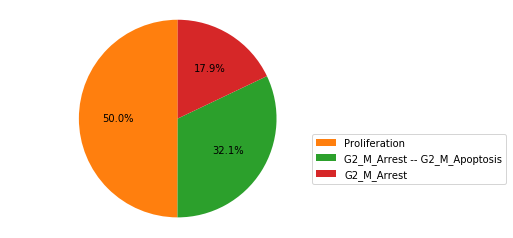

In [66]:
gupta_maboss_results.plot_piechart()

To summarize, we compare all the results we found up until now using both GINsim and MaBoSS, which are pretty much the same. Note that even the results of the MaBoSS simulation are probabilistic, they shouldn't be too far from what is written in the table below and that the probability of reaching the apoptosis state is almost twice as much as reaching the cell cycle arrest state:

Phenotype | GINsim (authors) | GINsim (reproduced) | MaBoSS (ours)
--- | --- | --- | ---
Proliferation | 50% | 50.27% | 50%
G2/M Arrest | 16% | 15.71% | 18%
Apoptosis | 34% | 34.03% | 32%


We can also plot the mean state value of each output node during the simulations and for each combination of output nodes. As we see below, the system stabilizes at 3 possible states (all the others tend to zero) which represent the 3 fixed points mentioned above:

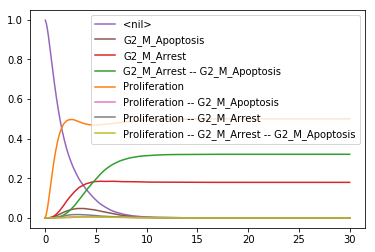

In [67]:
gupta_maboss_results.plot_trajectory(until = 30)

Note that the "<nil\>" phenotype has all output nodes set to 0 (usually referred to as "homeostatic state").

Now we will formally verify that there is no stable states in which `Proliferation` is active along with either `G2_M_Arrest` or `G2_M_Apoptosis` being active as well (or both of them) and that there can be no active `G2_M_Apoptosis` state alone - that is with `G2_M_Arrest` being inactive - in the wild-type network. The aforementioned cases represent curves in the previous trajectory plot which have stabilized to zero probability. We will use the [Pint](http://doi.org/10.1007/978-3-319-67471-1_20) tool and the model checking software [NuSMV](http://doi.org/10.1007/3-540-45657-0_29) for this analysis. First we convert the BioLQM model to a Pint model:

In [68]:
gupta_pint = biolqm.to_pint(gupta_lqm)

We can calculate the fixed points also with Pint and they are of course the same as the ones found with the other tools:

In [69]:
tabulate(gupta_pint.fixpoints())

|    |   IR |   ATM |   ATR |   Mdm2 |   p53_MAIN |   p53_INP1 |   p53_Arrest |   Wip1 |   p53_Killer |   p21 |   p14_3_3s |   miR_449a |   c_Myc |   Cdc25ABC |   RB |   E2F1 |   Cdc2_CycB |   Sirt_1 |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|------:|------:|-------:|-----------:|-----------:|-------------:|-------:|-------------:|------:|-----------:|-----------:|--------:|-----------:|-----:|-------:|------------:|---------:|----------------:|--------------:|-----------------:|
|  0 |    0 |     0 |     0 |      1 |          0 |          0 |            0 |      0 |            0 |     0 |          0 |          0 |       1 |          1 |    0 |      1 |           1 |        1 |               1 |             0 |                0 |
|  1 |    1 |     0 |     1 |      0 |          1 |          1 |            1 |      1 |            0 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                0 |
|  2 |    1 |     1 |     1 |      0 |          1 |          1 |            0 |      0 |            1 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                1 |

Next, we transfer the initial conditions defined in MaBoSS to the Pint model:

In [70]:
gupta_pint.initial_state.update(gupta_maboss.get_initial_state())
# Check the initial state
#headerList = ['Node', 'State']
#tabulate(gupta_pint.initial_state.items(), headers = headerList)

With Pint, we can also check if a goal (state) is reachable from the initial state. The tool will first try static analysis and if the result is inconclusive, it will fallback to exact model-checking:

In [71]:
gupta_pint.reachability(Proliferation=1, G2_M_Apoptosis=1, G2_M_Arrest=1)

Approximations are inconclusive, fallback to exact model-checking with `its`

True

This means that the state where all output nodes are active is reachable, but there shouldn't be such a stable state. We now convert from the Pint model to an NuSMV model, while keeping the same initial state as defined in the Pint model:

In [72]:
gupta_smv = gupta_pint.to_nusmv(skip_init=False)

Then, we define the temporal logic [CTL](http://doi.org/10.1007/BFb0025774) to specify formally the dynamical properties we want verify and we run the checker:

In [73]:
non_possible_stable_state_1 = EF(AG(S(Proliferation=1, G2_M_Apoptosis=1)))
non_possible_stable_state_2 = EF(AG(S(Proliferation=1, G2_M_Arrest=1)))
non_possible_stable_state_3 = EF(AG(S(G2_M_Apoptosis=1, G2_M_Arrest=0)))
non_possible_stable_state_4 = EF(AG(S(Proliferation=1, G2_M_Apoptosis=1, G2_M_Arrest=1)))
possible_stable_state_1 = EF(AG(S(Proliferation=1)))
possible_stable_state_2 = EF(AG(S(G2_M_Arrest=1, G2_M_Apoptosis=1)))
possible_state_1 = EF(S(Proliferation=1, G2_M_Apoptosis=1))
possible_state_2 = EF(S(Proliferation=1, G2_M_Arrest=1))
possible_state_3 = EF(S(Proliferation=1, G2_M_Apoptosis=1, G2_M_Arrest=1)) # as checked with Pint above

In [74]:
ctl_specs = {
    "non_possible_stable_state_1": non_possible_stable_state_1,
    "non_possible_stable_state_2": non_possible_stable_state_2,
    "non_possible_stable_state_3": non_possible_stable_state_3,
    "non_possible_stable_state_4": non_possible_stable_state_4,
    "possible_stable_state_1": possible_stable_state_1,
    "possible_stable_state_2": possible_stable_state_2,
    "possible_state_1": possible_state_1,
    "possible_state_2": possible_state_2,
    "possible_state_3": possible_state_3
}

In [75]:
gupta_smv.add_ctls(ctl_specs)

In [76]:
%time gupta_smv.verify()

CPU times: user 3.37 ms, sys: 3.85 ms, total: 7.22 ms
Wall time: 11.1 s


{'non_possible_stable_state_1': False,
 'non_possible_stable_state_2': False,
 'non_possible_stable_state_3': False,
 'non_possible_stable_state_4': False,
 'possible_stable_state_1': True,
 'possible_stable_state_2': True,
 'possible_state_1': True,
 'possible_state_2': True,
 'possible_state_3': True}

So the results for the non-possible stable states are `False`, which means that indeed these states cannot be reached. The results that came out `True` referred to transient dynamics, i.e. reachable but non-permanent states.

### Model Validation

In this section, the authors tried to validate their model by conducting simulations of node perturbations to investigate the correspondence between stable states of the model and experimental observations. They constructed a table that showed the agreement between their results and experimental observations. For ease of the analysis, we present the same table here (E1 represents Ectopic expression and KO represents Knockout of the corresponding gene):

Case | Stimulus/Perturbations | Response/phenotype
---|---|---
1|MiR-449 in response to IR | Upregulation
2|miR-449a KO	| Proliferation
3|miR-449a E1	| Inhibits proliferation/Induce cell cycle arrest and apoptosis
4|MiR-449 and Myc in response to IR | Negative correlation
5|Myc KO | G2/M arrest, Apoptosis


We analyse each case/row seperately using BioLQM:
- The **1st and 4th cases** are easily verified from the wild-type attractor analysis: when `IR` is `ON` then the `miR-449a` is upregulated (this happens in 2 out of the 3 fixed points) while in the same attractors the state of the node `Myc` is `OFF` (negative correlation between two nodes means when one node is active the other is inactive).

In [77]:
fps = biolqm.fixpoints(gupta_lqm)
nodes_to_keep = ['IR', 'miR_449a', 'c_Myc']
shortened_fps = []

for fp in fps:
    if (fp.get('IR') == 1):
        dict = {}
        for node in nodes_to_keep:
            dict[node] = fp.get(node) 
        shortened_fps.append(dict)
tabulate(shortened_fps)

|    |   IR |   miR_449a |   c_Myc |
|---:|-----:|-----------:|--------:|
|  0 |    1 |          1 |       0 |
|  1 |    1 |          1 |       0 |

- The **2nd case** is also reproducible (when there is no radiation and `miR-449a` is knocked out, prostate cancer cells proliferate):

In [78]:
fps = biolqm.fixpoints(biolqm.perturbation(gupta_lqm, "miR_449a%0"))
nodes_to_keep = ['IR', 'miR_449a', 'Proliferation', 'G2_M_Arrest', 'G2_M_Apoptosis']

def prune_fixpoint_list(fps, nodes_to_keep):
    shortened_fps = []
    for fp in fps:
        dict = {}
        for node in nodes_to_keep:
            dict[node] = fp.get(node) 
        shortened_fps.append(dict)
    return shortened_fps

shortened_fps = prune_fixpoint_list(fps, nodes_to_keep)
tabulate(shortened_fps)

|    |   IR |   miR_449a |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|-----------:|----------------:|--------------:|-----------------:|
|  0 |    0 |          0 |               1 |             0 |                0 |
|  1 |    1 |          0 |               0 |             1 |                1 |

- The **3rd case**, where the ectopic expression of `miR-449a` inhibits proliferation and induces cell cycle arrest and apoptosis is also verifiable:

In [79]:
fps = biolqm.fixpoints(biolqm.perturbation(gupta_lqm, "miR_449a%1"))
nodes_to_keep = ['IR', 'miR_449a', 'Proliferation', 'G2_M_Arrest', 'G2_M_Apoptosis']

shortened_fps = prune_fixpoint_list(fps, nodes_to_keep)
tabulate(shortened_fps)

|    |   IR |   miR_449a |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|-----------:|----------------:|--------------:|-----------------:|
|  0 |    1 |          1 |               0 |             1 |                0 |
|  1 |    1 |          1 |               0 |             1 |                1 |

We can also formally prove that the proliferation stable state is never reached (only transiently) using Pint and NuSMV: 

In [80]:
gupta_smv_mutated = gupta_pint.lock(miR_449a=1).to_nusmv(skip_init=False)

proliferation_stable = EF(AG(S(Proliferation=1)))
proliferation_transient = EF(S(Proliferation=1))

ctl_specs = {
    "proliferation_stable": proliferation_stable,
    "proliferation_transient": proliferation_transient
}

gupta_smv_mutated.add_ctls(ctl_specs)
gupta_smv_mutated.verify()

{'proliferation_stable': False, 'proliferation_transient': True}

- Lastly, the **5th case**, where the knockout of `Myc` induces cell cycle arrest and apoptosis (in presence of `IR`) is also verifiable. Note that we calculated the fixpoints using Pint in this case:

In [81]:
gupta_pint_mutated = biolqm.to_pint(biolqm.perturbation(gupta_lqm, "c_Myc%0"))

fps = gupta_pint_mutated.fixpoints()
nodes_to_keep = ['IR', 'c_Myc', 'Proliferation', 'G2_M_Arrest', 'G2_M_Apoptosis']

shortened_fps = prune_fixpoint_list(fps, nodes_to_keep)
tabulate(shortened_fps)

|    |   IR |   c_Myc |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|--------:|----------------:|--------------:|-----------------:|
|  0 |    0 |       0 |               1 |             0 |                0 |
|  1 |    1 |       0 |               0 |             1 |                0 |
|  2 |    1 |       0 |               0 |             1 |                1 |

### Role of functional circuits and phenotype probabilities

The authors mentioned they found **10** functional circuits. Using GINsim and the tool `Analyse circuits => Functionality Analysis` for the wild-type network we found **11** functional circuits:

In [82]:
Image(url = "./images/circuits.png")

We output a table comparing the results from the authors and from our replication study:

Circuits| Found by Authors | Found by our study | miR-449a in functionality context (our study)
---|---|---|---
**Positive**|||
RB/Mdm2 | YES |	YES | 
E2F1/ATM | YES | YES | YES (`OFF`)
E2F1/c-Myc | YES | YES | YES (`OFF`)
**p53-MAIN/14-3-3s (not a circuit)** | YES | **NO** | 
p53-MAIN/p53-Killer/14-3-3s | **NO** | YES | 
p53-MAIN/p53-Arrest/14-3-3s | **NO** | YES | 
p53-Killer/p53-Arrest | YES | YES | 
**Negative** |||
p53-MAIN/Mdm2 | YES | YES | 
p53-INP1/p53-Arrest | YES |	YES | 
**ATM/p53-MAIN/Wip1 (not a circuit)** | YES | **NO** | 
ATM/p53-MAIN/p53-Arrest/Wip1 | **NO** | YES | 
Sirt-1/E2F1 | YES | YES | YES (`ON`)
E2F1/Cdc25ABC/ATM | YES | YES | YES (`OFF`)

Notes:
- On the 4th column, where we show the circuits that include the `miR-449a` node in their functionality context, we also add the information if that particular node needs to be activated or inhibited in that functional context. So, only the `Sirt-1/E2F1` circuit has the `miR-449a` node in its functionality context as activated.
- The `p53-MAIN/14-3-3s` circuit mentioned in the paper is not even a circuit in the model as we can easily verify and the same stands true for the `ATM/p53-MAIN/Wip1` sequence of nodes. This is probably a mistake made by the authors and we have marked them both with bold in the table above.
- The authors claim that **7** of their found circuits have their functionality controlled by `miR-449a`, but we only found **4** of them (see table above). They also determine that `p53-MAIN` activation and the positive circuit `p53-Arrest/p53-killer` are required to produce the bistability between cell cycle arrest and apoptosis. Though we found that the activation of `p53-MAIN` functionally controlls the `p53-Killer/p53-Arrest` circuit, this is not the case for the `miR-449a` node.


Next, the authors wanted to find out how these circuits affected the bistability (cell cycle arrest, apoptosis) induced by the activation of `miR-449a`. To unravel this mechanism, they used perturbations on the nodes of every circuit (in addition to perturbing the node `miR-449a` as `ON`) that had either the `p53-MAIN`, the `p53-Arrest` or the `p53-killer` involved (by this they probably mean either that at least one of these 3 nodes is present in the functional context of the circuit or that it is *part* of the circuit itself) and whose functionality is controlled by `miR-449a`. So, they showed that for these circuits that satisfied the above criteria, **the probability to reach the apoptosis state was higher than the cell cycle arrest state in each case** (simulations were done using the Monte Carlo algorithm offered by GINsim for assessing attractor reachability). 

The authors tested the below 5 circuits: 

- **ATM/p53-MAIN/Wip1**
- p53-MAIN/Mdm2
- E2F1/Sirt-1
- RB/Mdm2
- **p53-MAIN/14-3-3s**

Since 2 of them are not even circuits and it seems there is a difference between the functionality context of the circuits as found by our replication study vs the authors' work, we will choose the 4 circuits from the table above which included `miR-449a` in their functionality context (note that the `E2F1/Sirt-1` circuit is common in our selection and the authors' one):

- E2F1/Sirt-1 (has `miR-449a` in its functional context as activated)
- E2F1/ATM
- E2F1/c-Myc
- E2F1/Cdc25ABC/ATM

So, for each of these circuits, we will try every possible perturbation of the nodes (along with `miR-449a` perturbed as always active) using MaBoSS and we will measure the mean probabilities of the output states. Firstly, we set the initial state of the `IR` node to 1, since it is the only input of the `miR-449a` (which we will perturb to `ON` nonetheless) and it makes sense in our case to start the simulations from that initial state. Also, we change a little bit the parameters for the simulations to allow faster computing:

In [83]:
maboss.set_nodes_istate(gupta_maboss, ["IR"], [0, 1])
gupta_maboss.update_parameters(discrete_time=0, use_physrandgen=0,
        seed_pseudorandom=100, sample_count=50000,
        max_time=30, time_tick=0.1, thread_count=4,
        statdist_traj_count=100, statdist_cluster_threshold=0.9)

In [84]:
# build the list of all candidate mutants from the given circuits
circuit1 = ["E2F1", "Sirt_1"]
circuit2 = ["E2F1", "ATM"]
circuit3 = ["E2F1", "c_Myc"]
circuit4 = ["E2F1", "Cdc25ABC", "ATM"]

circuits_to_test = []
circuits_to_test.append(circuit1)
circuits_to_test.append(circuit2)
circuits_to_test.append(circuit3)
circuits_to_test.append(circuit4)

def build_all_mutations_list(circuits):
    all_mutants_list = []
    for circuit in circuits:
        all_mutants_list += make_mutants_list(circuit, get_perturbation_comb(circuit))
    return all_mutants_list

def get_perturbation_comb(circuit):
    binary = [0, 1]
    return list(product(binary, repeat = len(circuit)))

def make_mutants_list(circuit, perturbation_comb):
    mut_list = []
    for perturbation in perturbation_comb:
        mut_dict = make_mutant(circuit, perturbation)
        mut_list.append(mut_dict)
    return mut_list

def make_mutant(circuit, perturbation_comb):
    mut_dict = {}
    for elem in zip(circuit, perturbation_comb):
        mut_dict[elem[0]] = elem[1]
    return mut_dict

mutants = build_all_mutations_list(circuits_to_test)
print(mutants)

[{'E2F1': 0, 'Sirt_1': 0}, {'E2F1': 0, 'Sirt_1': 1}, {'E2F1': 1, 'Sirt_1': 0}, {'E2F1': 1, 'Sirt_1': 1}, {'E2F1': 0, 'ATM': 0}, {'E2F1': 0, 'ATM': 1}, {'E2F1': 1, 'ATM': 0}, {'E2F1': 1, 'ATM': 1}, {'E2F1': 0, 'c_Myc': 0}, {'E2F1': 0, 'c_Myc': 1}, {'E2F1': 1, 'c_Myc': 0}, {'E2F1': 1, 'c_Myc': 1}, {'E2F1': 0, 'Cdc25ABC': 0, 'ATM': 0}, {'E2F1': 0, 'Cdc25ABC': 0, 'ATM': 1}, {'E2F1': 0, 'Cdc25ABC': 1, 'ATM': 0}, {'E2F1': 0, 'Cdc25ABC': 1, 'ATM': 1}, {'E2F1': 1, 'Cdc25ABC': 0, 'ATM': 0}, {'E2F1': 1, 'Cdc25ABC': 0, 'ATM': 1}, {'E2F1': 1, 'Cdc25ABC': 1, 'ATM': 0}, {'E2F1': 1, 'Cdc25ABC': 1, 'ATM': 1}]


Total simulation time: 46.91 seconds


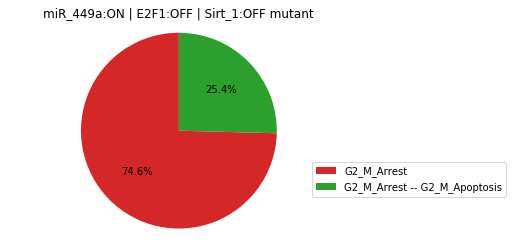

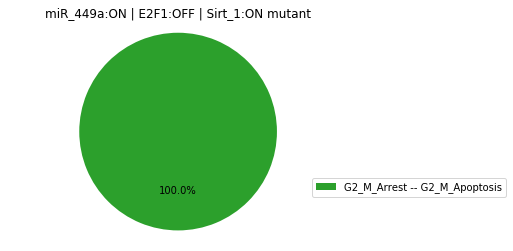

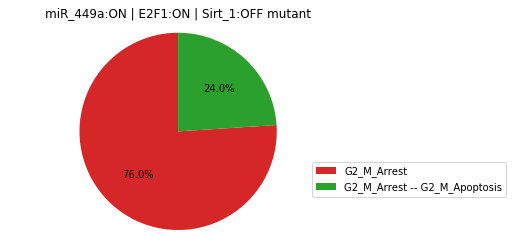

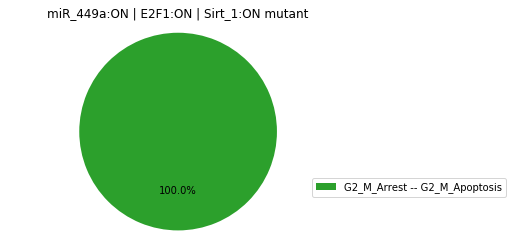

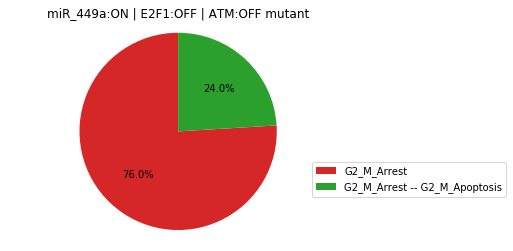

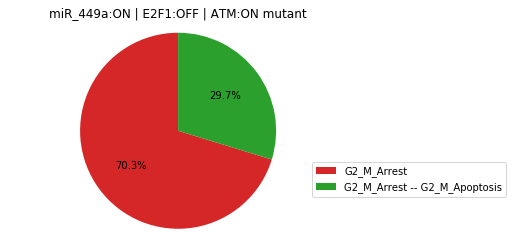

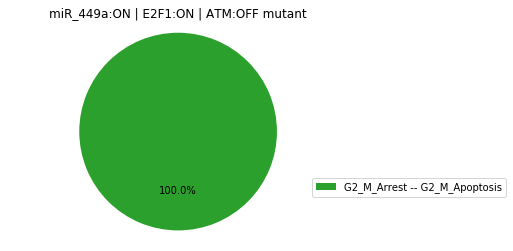

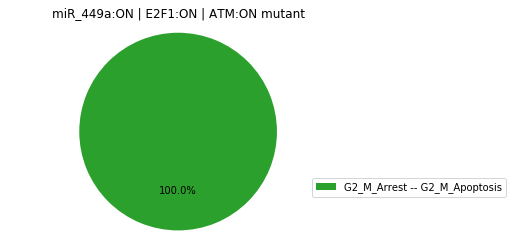

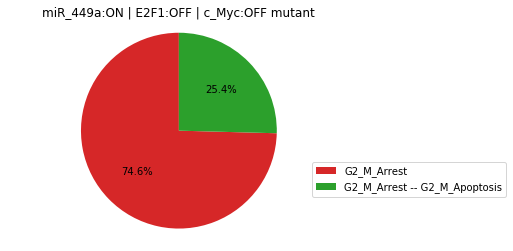

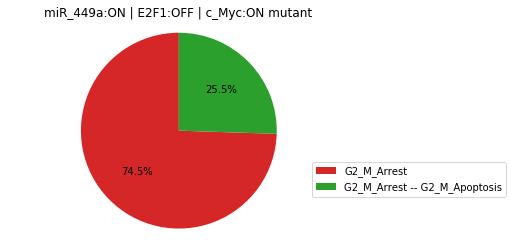

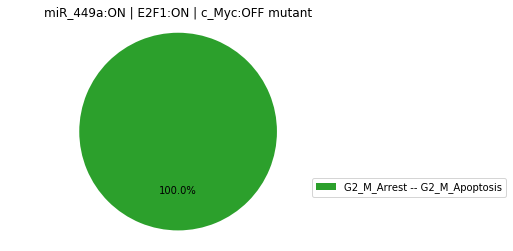

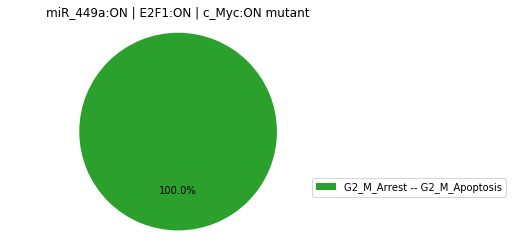

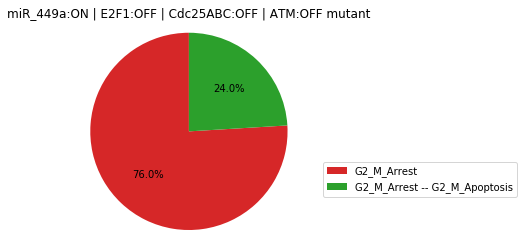

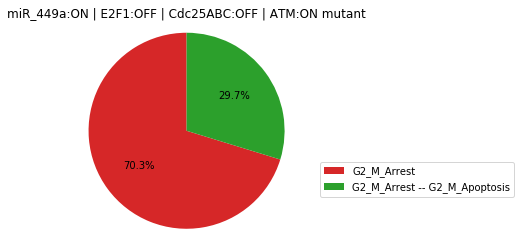

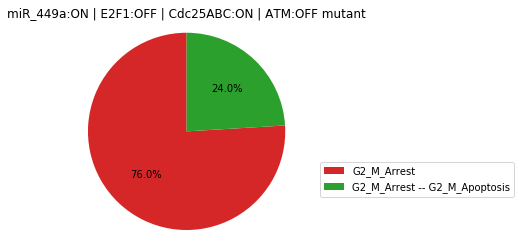

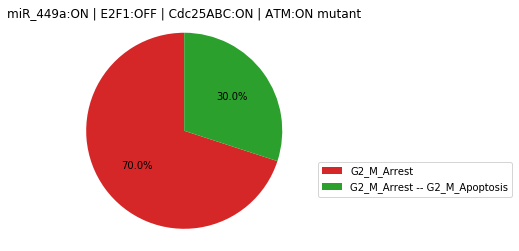

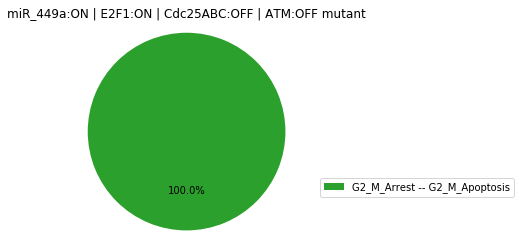

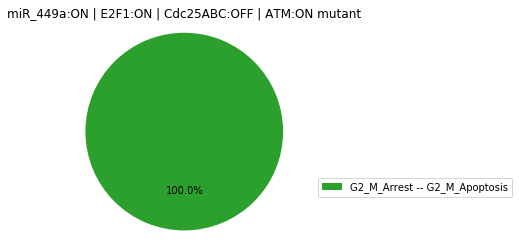

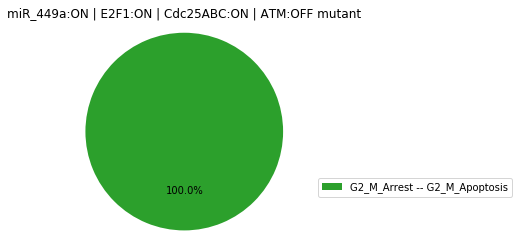

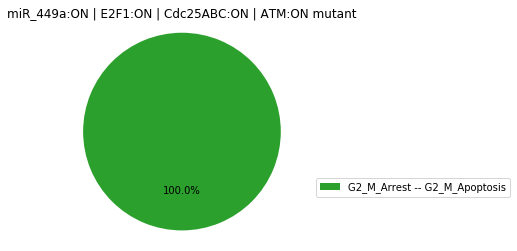

In [85]:
# Run simulations 
start_time = timeit.default_timer()

for mutant in mutants:
    # copy the wild-type MaBoSS model
    mutated_model = gupta_maboss.copy()
    # apply miR-449a mutation
    mutated_model.mutate("miR_449a", "ON")
    # apply the rest of the mutations
    for m in mutant:
        mutated_model.mutate(m, "ON" if mutant[m] else "OFF")
    # run the simulations
    mutated_model_results = mutated_model.run()
    # plot the piechart of stable states
    mutated_model_results.plot_piechart()
    # print the mutation in the title
    def mutname(m):
        return m + (":ON" if mutant[m] else ":OFF")
    name = "miR_449a:ON | " + " | ".join(map(mutname, mutant))
    plt.title("%s mutant" % name)

elapsed = timeit.default_timer() - start_time
print("Total simulation time: %s seconds" % "{:.2f}".format(elapsed))

Notes:
- There are differences between our results and the authors' regarding the circuit that was commonly tested by us and them (see the comparison table below):

Common Circuit | Pertubations | Probability G2/M (authors) | Probability G2/M (our study) | Probability Apoptosis (authors) | Probability Apoptosis (our study)
--- | --- | --- | --- |
E2F1/Sirt-1 | KO/KO	| 31% | 75% | 69% | 25%
E2F1/Sirt-1 | E1/KO	| 36% | 75% | 64% | 25%
E2F1/Sirt-1 | KO/E1	|  -  | 0% | - | 100%
E2F1/Sirt-1 | E1/E1	|  -  | 0% | - | 100%

We don't know why not all the perturbation results are presented in their study (for this circuit and others) but nonetheless our results are totally different and it seems that the activation of the `Sirt-1` node is the most important one since it corresponds to a 100% probability of reaching the apoptosis state.

- In all circuits that we choose for our analysis the node `E2F1` is always present and in all perturbations - except one - that resulted in a larger probability of apoptosis than cell cycle arrest this node is `ON`. So, it seems that there is a high correlation between the activation of that particular node and the probability to reach the apoptosis state even though in the wild-type network the upregulation of `miR-449a` also causes reduced `E2F1` expression.

- If we compute the average probability to reach each of the two candidate phenotypes (G2/M cycle arrest and apoptosis) considering our results from all the possible perturbations above (whose functionality is controlled by `miR-449a`), we have that: 

Average Probability G2/M | Average Probability Apoptosis
--- | ---
37% | 63%

So, in overall, we found a **higher probability to obtain apoptosis than cell cycle arrest** (although there are perturbations that can produce the opposite result), which is also the main result of the authors.

## Model extension analysis

The authors mention that the reported activatory interaction of `miR-449a` by `E2F1` for some cell lines, is not determinant for the state of the microRNA in LNCaP cells and that's why they ignored that interaction in their model. So, in this section we will add the `E2F1 -> miR-449a` edge to the studied model and analyze the behaviour of the cancer cell systems that are influenced by it.

### Boolean equation of target `miR-449a`

Since the node `miR-449a` has now two regulators, we have to decide upon the logical rule for that target node. Since both `IR` and `E2F1` act as **activation regulators**, we have two choices for that boolean equation:
- `miR-449a *= IR | E2F1`
- `miR-449a *= IR & E2F1`

So, we created two new models (each corresponding to a different equation) to test. Below you can see the network where the node `miR-449a` has two regulators: 

Downloading 'https://raw.githubusercontent.com/bblodfon/colomotoGupta/master/gupta_model_extend_and.zginml'

Downloading 'https://raw.githubusercontent.com/bblodfon/colomotoGupta/master/gupta_model_extend_or.zginml'

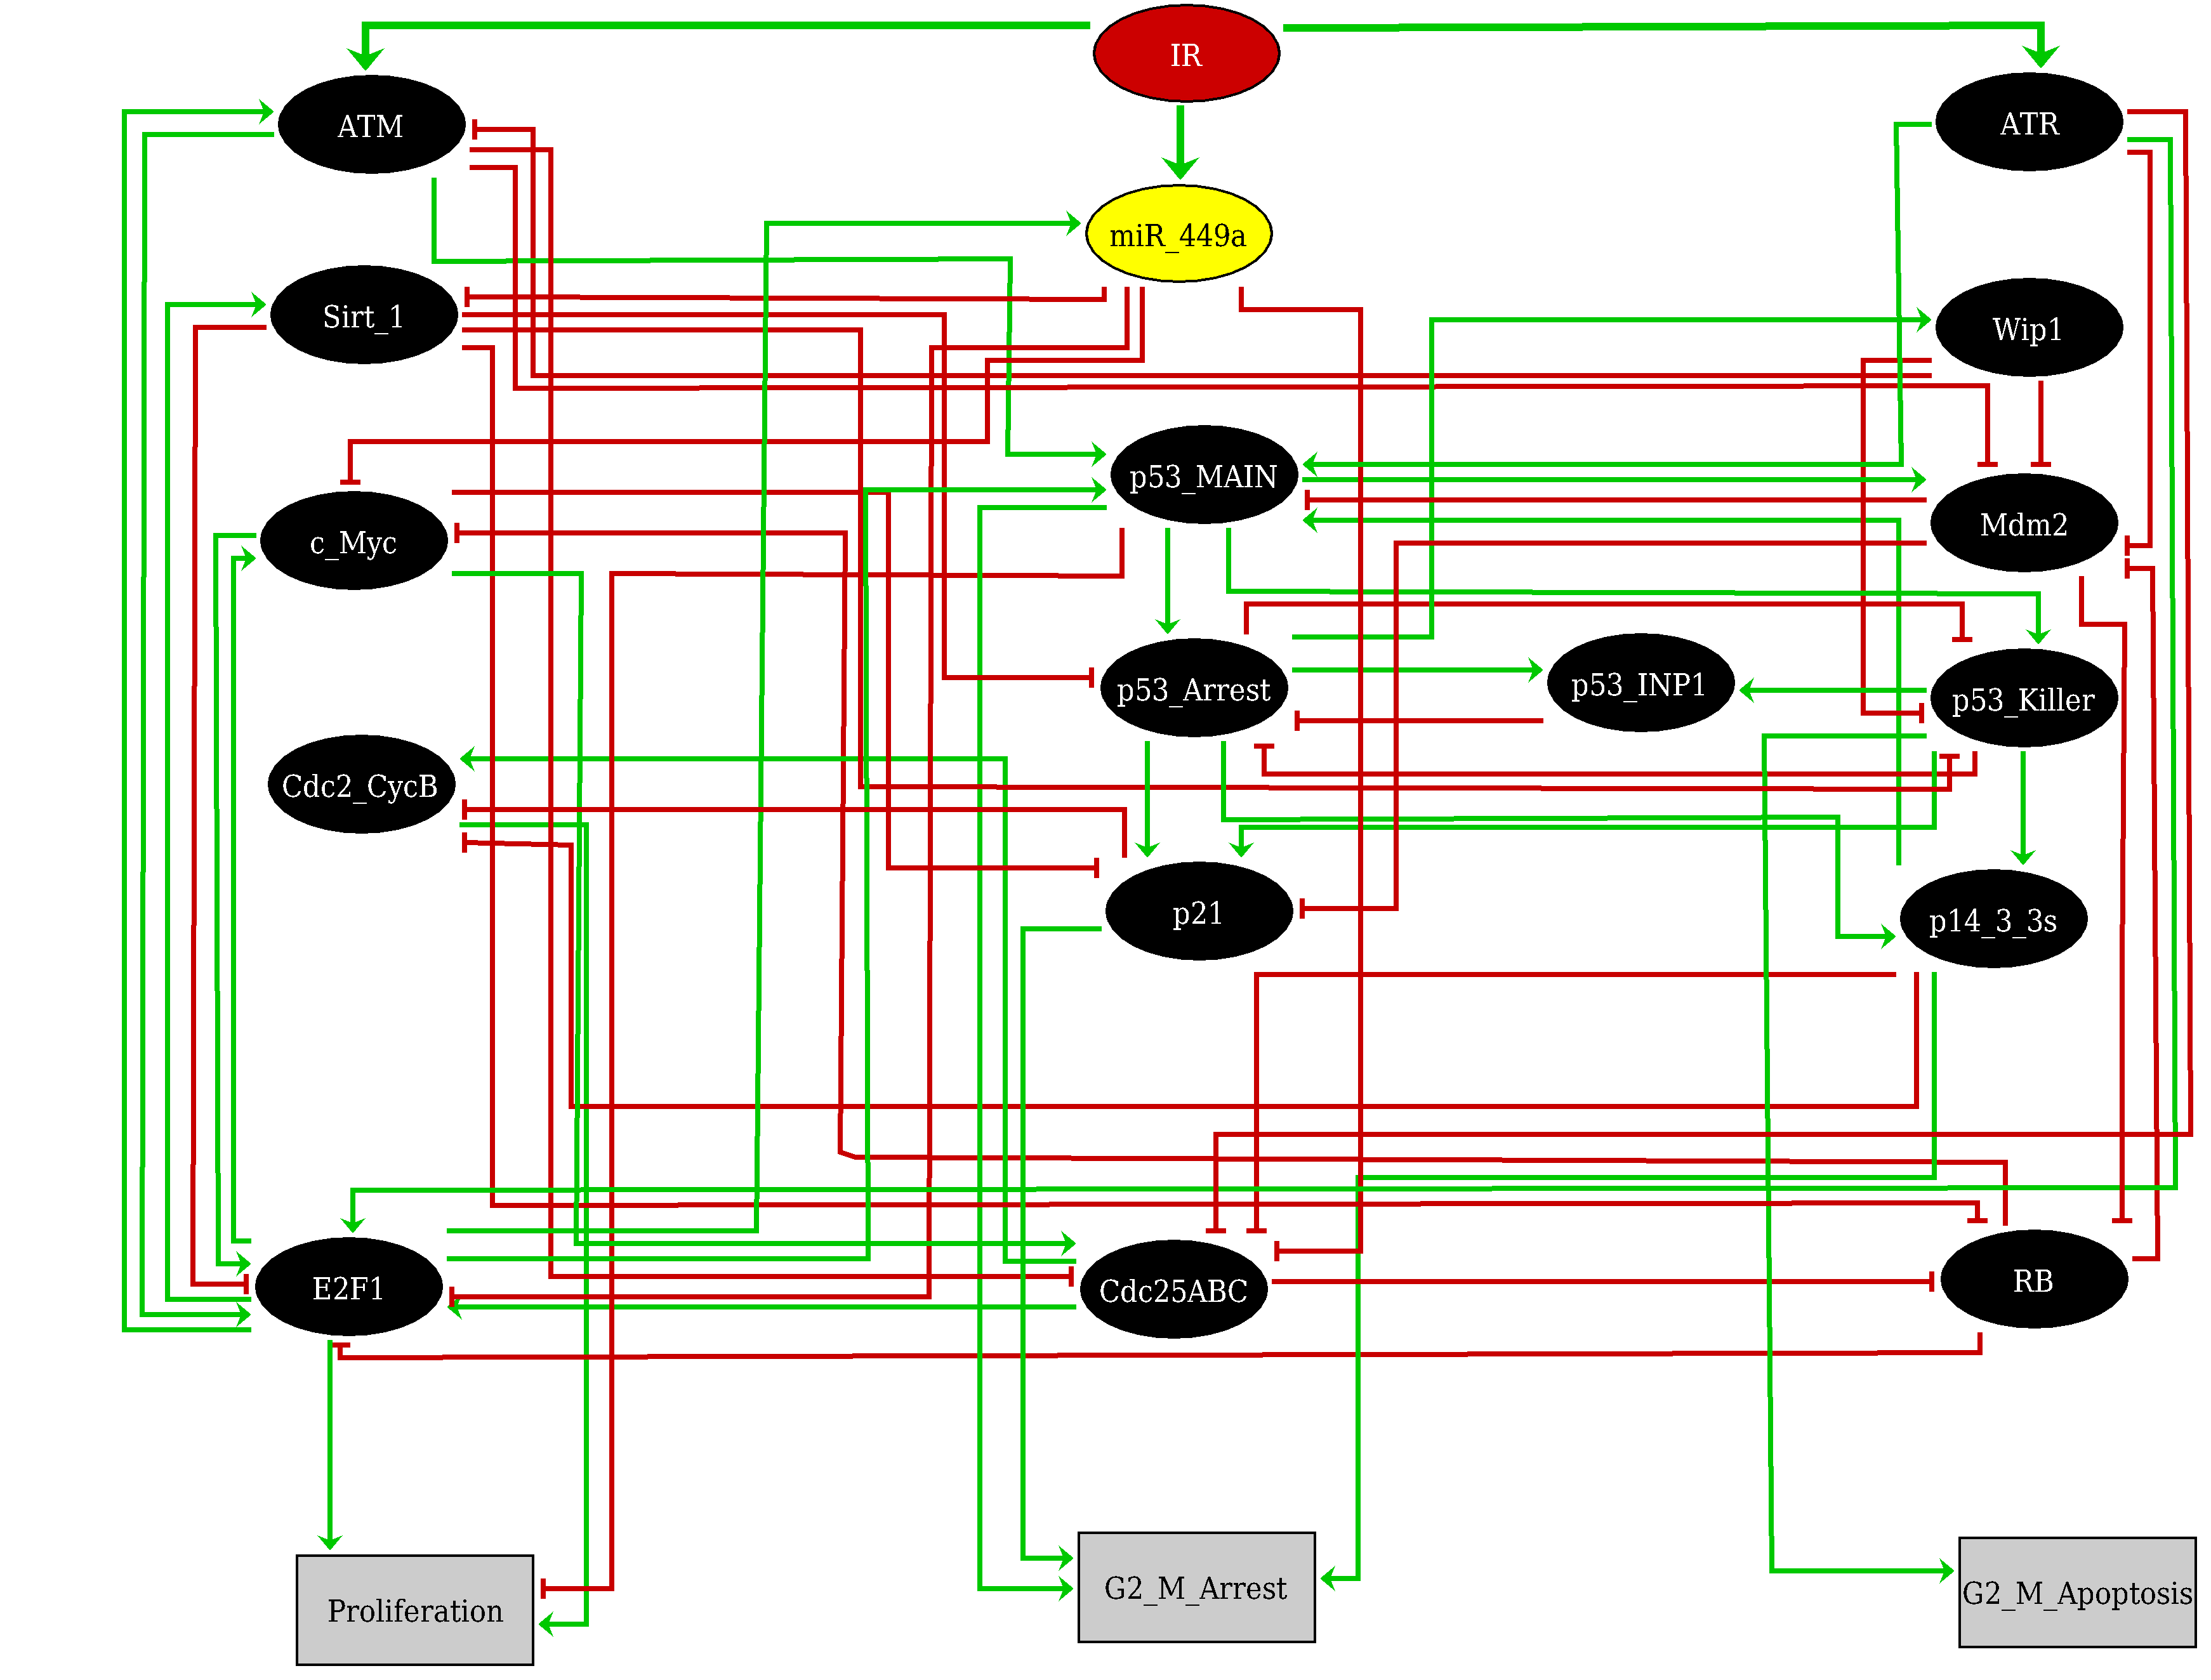

In [86]:
gupta_ginsim_and = ginsim.load("https://raw.githubusercontent.com/bblodfon/colomotoGupta/master/gupta_model_extend_and.zginml")
gupta_ginsim_or = ginsim.load("https://raw.githubusercontent.com/bblodfon/colomotoGupta/master/gupta_model_extend_or.zginml")
ginsim.show(gupta_ginsim_or)

### Attractors

First, we convert the GINsim models to BioLQM and then we compute the wild-case trapspaces (the fixpoints are included) for each model (we will call them `and_model` and `or_model` respectively):

In [87]:
gupta_lqm_or = ginsim.to_biolqm(gupta_ginsim_or)
gupta_lqm_and = ginsim.to_biolqm(gupta_ginsim_and)

In [88]:
tabulate(biolqm.trapspace(gupta_lqm_and))

|    |   IR |   ATM |   ATR |   Mdm2 |   p53_MAIN |   p53_INP1 |   p53_Arrest |   Wip1 |   p53_Killer |   p21 |   p14_3_3s |   miR_449a |   c_Myc |   Cdc25ABC |   RB |   E2F1 |   Cdc2_CycB |   Sirt_1 |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|------:|------:|-------:|-----------:|-----------:|-------------:|-------:|-------------:|------:|-----------:|-----------:|--------:|-----------:|-----:|-------:|------------:|---------:|----------------:|--------------:|-----------------:|
|  0 |    1 |     1 |     1 |      0 |          1 |          1 |            0 |      0 |            1 |   255 |          1 |        255 |     255 |          0 |  255 |    255 |           0 |      255 |               0 |             1 |                1 |
|  1 |    0 |     0 |     0 |      1 |          0 |          0 |            0 |      0 |            0 |     0 |          0 |          0 |       1 |          1 |    0 |      1 |           1 |        1 |               1 |             0 |                0 |

In [89]:
tabulate(biolqm.trapspace(gupta_lqm_or))

|    |   IR |   ATM |   ATR |   Mdm2 |   p53_MAIN |   p53_INP1 |   p53_Arrest |   Wip1 |   p53_Killer |   p21 |   p14_3_3s |   miR_449a |   c_Myc |   Cdc25ABC |   RB |   E2F1 |   Cdc2_CycB |   Sirt_1 |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|------:|------:|-------:|-----------:|-----------:|-------------:|-------:|-------------:|------:|-----------:|-----------:|--------:|-----------:|-----:|-------:|------------:|---------:|----------------:|--------------:|-----------------:|
|  0 |    0 |     0 |     0 |    255 |        255 |        255 |          255 |    255 |          255 |   255 |        255 |        255 |     255 |        255 |  255 |    255 |         255 |      255 |             255 |           255 |              255 |
|  1 |    1 |     1 |     1 |      0 |          1 |          1 |            0 |      0 |            1 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                1 |
|  2 |    1 |     0 |     1 |      0 |          1 |          1 |            1 |      1 |            0 |     1 |          1 |          1 |       0 |          0 |    1 |      0 |           0 |        0 |               0 |             1 |                0 |

From the above results, we see that the two models have different attractors and show generally different behaviour. The `and_model` has only one fixed point and it corresponds to a proliferation state (but no stable states corresponding to either apoptosis or cell cycle arrest). The other attractor is a complex one and it represents the apoptosis state when in presense of ionizing radiation (note though that the two nodes `miR_449a` and `E2F1` are not part of a stable motif). On the other hand, the `or_model` does not have a fixed point corresponding to proliferation, while it has 2 of them corresponding to cell cycle and apoptosis. The complex attractor in this case (the trapspace actually) includes almost all the network nodes (they are oscillating). So, it seems that the `OR` choice for the boolean equation of the `miR-449a` node is a more robust one regarding stable attractor reachability since the `AND` operator imposes a more strict condition for the activation of `miR-449a`, but you can not simulate the proliferation state with that kind of model (which is not the situation in reality).

If we perturb the `miR-449a` node and force it to be activated, we have for both models the same attractors as the original model:

In [90]:
fps = biolqm.trapspace(biolqm.perturbation(gupta_lqm_and, "miR_449a%1"))
nodes_to_keep = ['IR', 'E2F1', 'miR_449a', 'Proliferation', 'G2_M_Arrest', 'G2_M_Apoptosis']

shortened_fps = prune_fixpoint_list(fps, nodes_to_keep)
tabulate(shortened_fps)

|    |   IR |   E2F1 |   miR_449a |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|-------:|-----------:|----------------:|--------------:|-----------------:|
|  0 |    1 |      0 |          1 |               0 |             1 |                0 |
|  1 |    0 |      0 |          1 |             255 |             0 |                0 |
|  2 |    1 |      0 |          1 |               0 |             1 |                1 |

In [91]:
fps = biolqm.trapspace(biolqm.perturbation(gupta_lqm_or, "E2F1:miR_449a%1"))
nodes_to_keep = ['IR', 'E2F1', 'miR_449a', 'Proliferation', 'G2_M_Arrest', 'G2_M_Apoptosis']

shortened_fps = prune_fixpoint_list(fps, nodes_to_keep)
tabulate(shortened_fps)

|    |   IR |   E2F1 |   miR_449a |   Proliferation |   G2_M_Arrest |   G2_M_Apoptosis |
|---:|-----:|-------:|-----------:|----------------:|--------------:|-----------------:|
|  0 |    1 |      0 |          1 |               0 |             1 |                0 |
|  1 |    0 |      0 |          1 |             255 |             0 |                0 |
|  2 |    1 |      0 |          1 |               0 |             1 |                1 |

So, in both models the `E2F1` node gets suppresed (which is supported from experimental observation when the `miR_449` is over-expressed) and we also get both the cell cycle arrest and apoptosis stable states. There is also a possibility of reaching a complex attractor state which corresponds to an oscillating proliferation node (since the node can be either `ON` or `OFF` in that attractor) in the absense of radiation (`IR` is `OFF`), which is the same of course as the original model's dynamical properties when the `miR_449` node is over-expressed.

Based on all the above observations, we conclude that the extended models need to be *further refined* (more proper logical rules, more interactions (edges) and/or nodes are needed) in order for their dynamical analysis results to better correspond to the wild-case dynamics of the modeled cancer cell system.